In [56]:
import sqlite3 as sqlite
import pandas as pd
import matplotlib.pyplot as plt

# Data for Stroke predictions

In [57]:
stroke = pd.read_csv('dbs/stroke/healthcare-dataset-stroke-data.csv')

In [58]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
conn_sql = sqlite.connect('MasterAll.db')
stroke.to_sql('stroke', con=conn_sql, if_exists='replace', index=False)

#we reload the data from the database
stroke = pd.read_sql('SELECT * FROM stroke', conn_sql)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [60]:
conn_sql.commit()
conn_sql.close()

In [61]:
#shape and dimension of dataframe stroke
print('Shape: ', stroke.shape)
print('Dimensions: ', stroke.ndim)

Shape:  (5110, 12)
Dimensions:  2


In [62]:
#checking types of data contained in dataframe
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [63]:
#check if any column has missing/nan values

#stroke.isnull().values.any()
stroke[stroke.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [64]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [65]:
stroke['bmi'].isnull()

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [66]:
p_stroke_nan = ((stroke.bmi.isnull()) & (stroke.stroke==1)).sum()
n_stroke_nan = ((stroke.bmi.isnull()) & (stroke.stroke==0)).sum()

p_stroke = (stroke.stroke==1).sum()
n_stroke = (stroke.stroke==0).sum()

print("Stroke with nan columns: ", p_stroke_nan)
print("No stroke with nan columns: ", n_stroke_nan)
print("Stroke sum: ", p_stroke)
print("No stroke sum: ", n_stroke)

Stroke with nan columns:  40
No stroke with nan columns:  161
Stroke sum:  249
No stroke sum:  4861


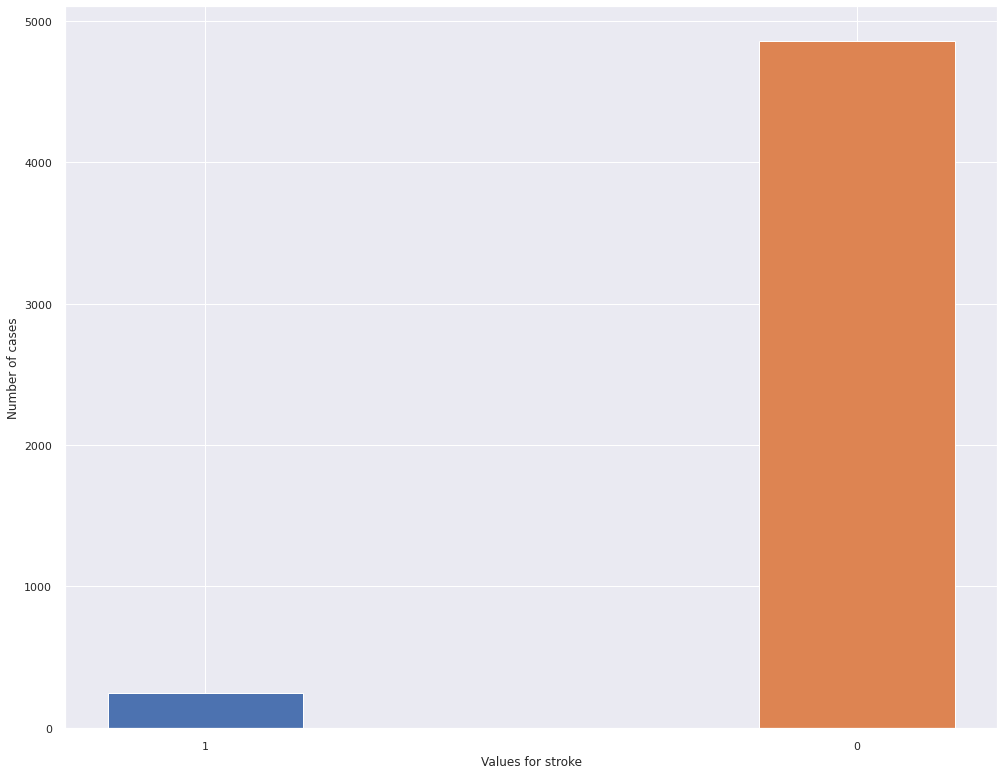

In [67]:
#let's plot it

plt.figure()
plt.bar('1', p_stroke, width=0.3)
plt.bar('0', n_stroke, width=0.3)
plt.ylabel('Number of cases')
plt.xlabel('Values for stroke')
plt.show()

In [68]:
#data is unbalanced hence we do not remove the rows containing nan
#as bmi contains float values we'll exchange the ones missing with the mean value of the column with SimpleImputer

from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
stroke[['bmi']] = imputer.fit_transform(stroke[['bmi']])



In [69]:
stroke.isnull().sum()
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [70]:
#Columns: gender, ever_married, work_type, Residence_type, smoking_status - need to be changed to integer columns as scikit is used only with integers with LabelEncoder

from sklearn.preprocessing import LabelEncoder

categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()

for i in range(len(categorical_features)):
    new = le.fit_transform(stroke[categorical_features[i]])
    stroke[categorical_features[i]] = new

stroke.head(5)  

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [71]:
#cur = conn_sql.cursor()
#cur.execute('DROP table stroke_clean')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [123]:
#conn_sql.rollback()

In [72]:
#we save the clean stroke to the db

conn_sql = sqlite.connect('MasterAll.db')
stroke.to_sql('stroke_clean', con=conn_sql, if_exists='replace', index=False)

#reload the clean data to new dataframe
stroke_c = pd.read_sql('SELECT * FROM stroke_clean', conn_sql)
stroke_c.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [73]:
#saving clean data to csv format so it can be reused
conn_sql = sqlite.connect('MasterAll.db')
stroke_some = pd.read_sql('SELECT * FROM stroke_clean', conn_sql)
stroke_some.to_csv('dbs/stroke/stroke_clean', index=False)

In [74]:
conn_sql.commit()

In [75]:
#stroke.drop('level_0', inplace=True, axis=1)
stroke_c.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


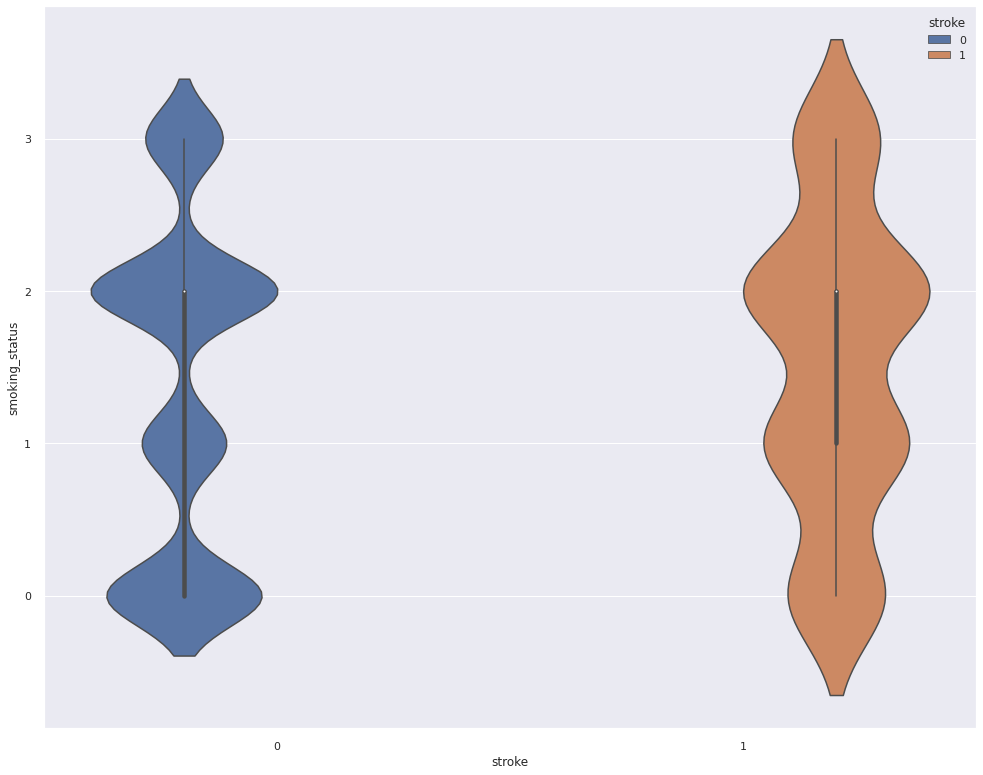

In [76]:
#visualizing the data
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(16.7,13.27)})
# plotting the violinplot

sns.violinplot(x="stroke",y="smoking_status", hue="stroke", data=stroke_c);
#sns.violinplot(x="stroke",y="avg_glucose_level", hue="stroke", data=stroke);
plt.show()

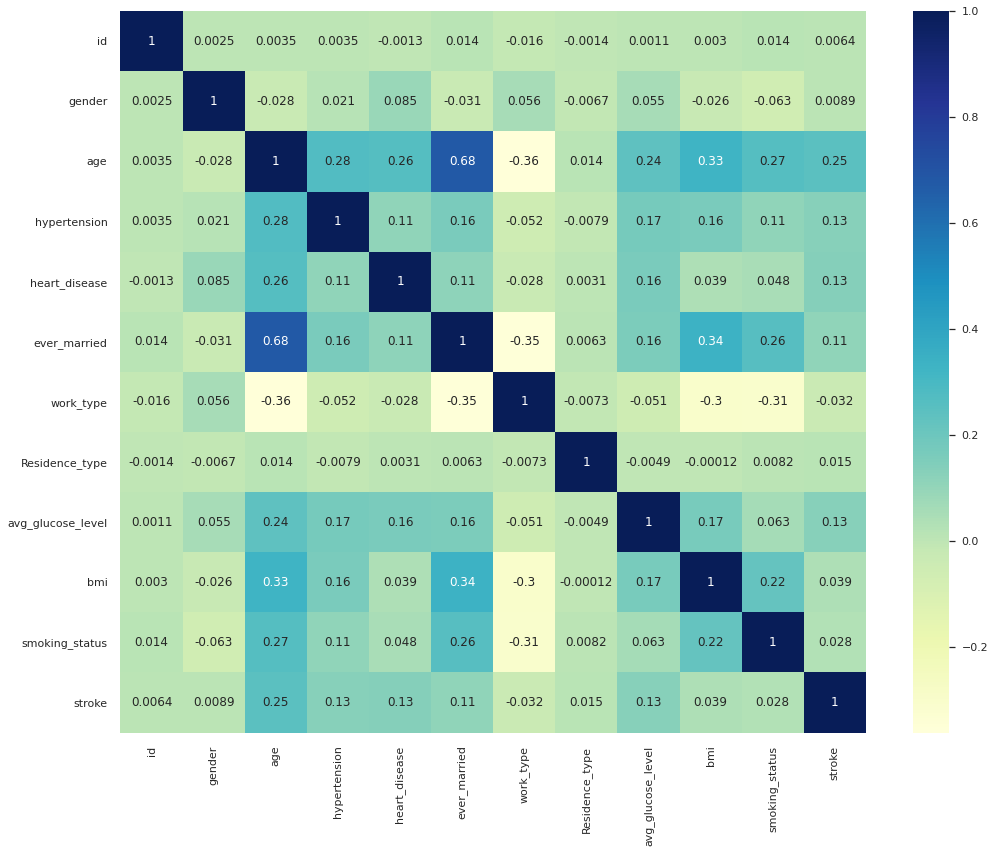

In [77]:
correlations = stroke_c.corr()
sns.heatmap(correlations, cmap="YlGnBu", annot=True)
plt.show()

In [78]:
#after preprocessing we define our target and features
X = stroke_c[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 
      'avg_glucose_level', 'bmi', 'smoking_status']]
y = stroke_c['stroke']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 1345
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
import time



In [80]:
num_folds = 15
seed = 7
scoring = 'r2'

models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVR', SVR()))
models.append(('RFC', RandomForestClassifier()))

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

KeyboardInterrupt: 

In [81]:
#Training the models and measuring duration
start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [82]:
print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

LogisticRegression: 
 time: 0.266
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.50      0.01      0.02        80

    accuracy                           0.95      1533
   macro avg       0.72      0.51      0.50      1533
weighted avg       0.92      0.95      0.92      1533

GaussianNB: 
 time: 0.011
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1453
           1       0.16      0.40      0.23        80

    accuracy                           0.86      1533
   macro avg       0.56      0.64      0.57      1533
weighted avg       0.92      0.86      0.88      1533

LinearSVC: 
 time: 0.313
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

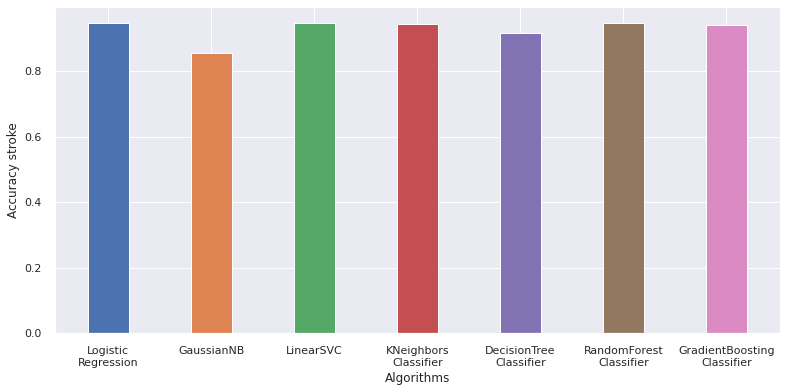

In [86]:
from sklearn.metrics import accuracy_score as acc

plt.figure(figsize=(13, 6))
plt.bar('Logistic\nRegression', acc(y_test, predictions_lr), width=0.4)
plt.bar('GaussianNB', acc(y_test, predictions_nb), width=0.4)
plt.bar('LinearSVC', acc(y_test, predictions_svc), width=0.4)
plt.bar('KNeighbors\nClassifier', acc(y_test, predictions_knn), width=0.4)
plt.bar('DecisionTree\nClassifier', acc(y_test, predictions_dtc), width=0.4)
plt.bar('RandomForest\nClassifier', acc(y_test, predictions_rfc), width=0.4)
plt.bar('GradientBoosting\nClassifier', acc(y_test, predictions_gbc), width=0.4)

plt.ylabel('Accuracy stroke')
plt.xlabel('Algorithms')
plt.show()


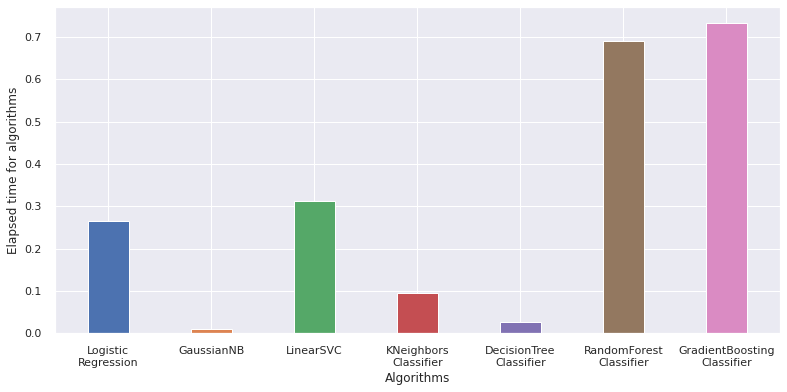

In [88]:
plt.figure(figsize=(13, 6))
plt.bar('Logistic\nRegression', elapsed_time_lr, width=0.4)
plt.bar('GaussianNB', elapsed_time_nb, width=0.4)
plt.bar('LinearSVC', elapsed_time_svc, width=0.4)
plt.bar('KNeighbors\nClassifier', elapsed_time_knn, width=0.4)
plt.bar('DecisionTree\nClassifier', elapsed_time_dtc, width=0.4)
plt.bar('RandomForest\nClassifier', elapsed_time_rfc, width=0.4)
plt.bar('GradientBoosting\nClassifier', elapsed_time_gbc, width=0.4)

plt.ylabel('Elapsed time for algorithms')
plt.xlabel('Algorithms')
plt.show()

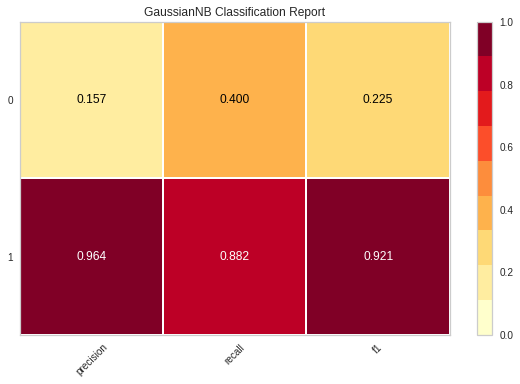

In [28]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(nb, classes=['1','0'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data


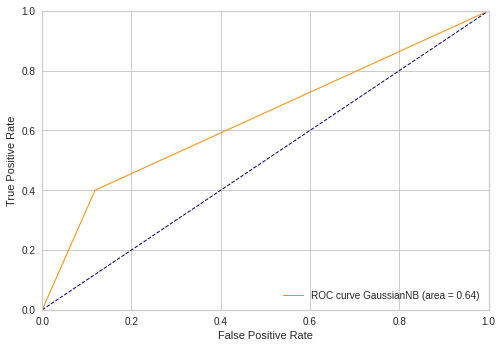

In [29]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_nb)
auc_nb = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GaussianNB (area = %0.2f)' % auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [30]:
conn_sql.commit()
conn_sql.close()

# Data hotel satisfaction

In [89]:
hotel_satisfaction = pd.read_csv('dbs/hotel_satisfaction/Hotel_Booking_Satisfaction_Score.csv')

In [90]:
hotel_satisfaction.columns = hotel_satisfaction.columns.str.replace(' ','_')
hotel_satisfaction.columns = hotel_satisfaction.columns.str.lower()
hotel_satisfaction.head()

,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure/arrival__convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin/checkout_service,other_service,cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [91]:
conn_sql = sqlite.connect('MasterAll.db')
hotel_satisfaction.to_sql('hotel_satisfaction', con=conn_sql, if_exists='replace', index=False)

#reload the data into the dataframe
hotel_satisfaction = pd.read_sql('SELECT * FROM hotel_satisfaction', conn_sql)
hotel_satisfaction.head()

,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure/arrival__convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin/checkout_service,other_service,cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [92]:
conn_sql.commit()


In [93]:
#shape and dimension of dataframe hotel_satisfaction
print('Shape: ', hotel_satisfaction.shape)
print('Dimensions: ', hotel_satisfaction.ndim)

Shape:  (103904, 17)
Dimensions:  2


In [94]:
#checking types of data contained in dataframe
hotel_satisfaction.dtypes

id                                 int64
gender                            object
age                                int64
purpose_of_travel                 object
type_of_travel                    object
type_of_booking                   object
hotel_wifi_service                 int64
departure/arrival__convenience     int64
ease_of_online_booking             int64
hotel_location                     int64
food_and_drink                     int64
stay_comfort                       int64
common_room_entertainment          int64
checkin/checkout_service           int64
other_service                      int64
cleanliness                        int64
satisfaction                      object
dtype: object

In [95]:
#check if any column has missing/nan values

hotel_satisfaction.isnull().values.any()
#hotel_satisfaction[hotel_booking.isnull().any(axis=1)]

False

In [96]:
hotel_satisfaction.head()

,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure/arrival__convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin/checkout_service,other_service,cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [97]:
#conn_sql = sqlite.connect('MasterAll.db')

values = pd.read_sql('SELECT DISTINCT satisfaction FROM hotel_satisfaction', conn_sql)
values

,satisfaction
0,neutral or dissatisfied
1,satisfied


In [98]:
#Target value will be hotel guests' satisfaction - so we will visualize the balance of levels of satisfaction

satisfied = (hotel_satisfaction.satisfaction=='satisfied').sum()
neutral_dissatisfied = (hotel_satisfaction.satisfaction=='neutral or dissatisfied').sum()

print("Satsified guests: %d" % satisfied)
print("Neutral or dissatisfied guests: %d" % neutral_dissatisfied)

Satsified guests: 45025
Neutral or dissatisfied guests: 58879


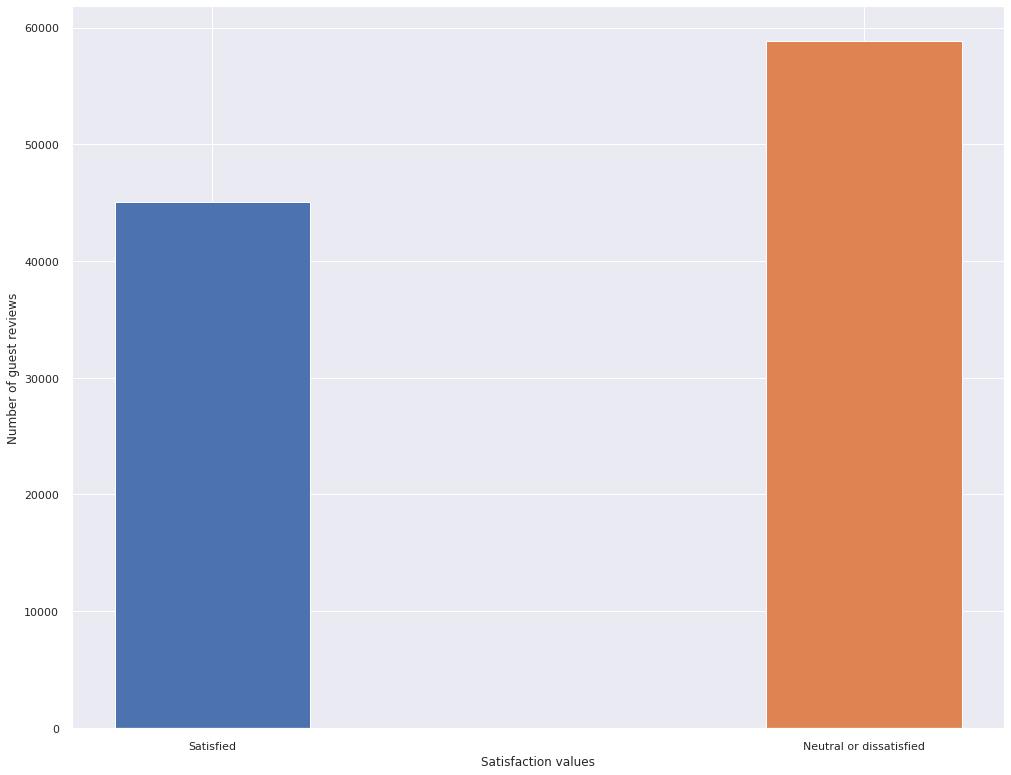

In [99]:
plt.figure()
plt.bar('Satisfied', satisfied, width=0.3)
plt.bar('Neutral or dissatisfied', neutral_dissatisfied, width=0.3)
plt.ylabel('Number of guest reviews')
plt.xlabel('Satisfaction values')
plt.show()

In [100]:
#Columns: gender, purpose_of_travel, type_of_travel, type_of_booking, satisfaction - need to be changed to integer columns as scikit is used only with integers with LabelEncoder

#from sklearn.preprocessing import LabelEncoder

categorical_features_b = ['gender', 'purpose_of_travel', 'type_of_travel', 'type_of_booking', 'satisfaction']
le = LabelEncoder()

for i in range(len(categorical_features_b)):
    new = le.fit_transform(hotel_satisfaction[categorical_features_b[i]])
    hotel_satisfaction[categorical_features_b[i]] = new

hotel_satisfaction.head(5) 

,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure/arrival__convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin/checkout_service,other_service,cleanliness,satisfaction
0,70172,1,13,1,1,2,3,4,3,1,5,5,5,4,5,5,0
1,5047,1,25,4,0,0,3,2,3,3,1,1,1,1,4,1,0
2,110028,0,26,4,0,0,2,2,2,2,5,5,5,4,4,5,1
3,24026,0,25,4,0,0,2,5,5,5,2,2,2,1,4,2,0
4,119299,1,61,1,0,0,3,3,3,3,4,5,3,3,3,3,1


In [101]:
#conn_sql = sqlite.connect('MasterAll.db')
hotel_satisfaction.to_sql('hotel_satisfaction_clean', con=conn_sql, if_exists='replace', index=False)

hotel_satisfaction_c = pd.read_sql('SELECT * FROM hotel_satisfaction_clean', conn_sql)
hotel_satisfaction_c.head()

,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure/arrival__convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin/checkout_service,other_service,cleanliness,satisfaction
0,70172,1,13,1,1,2,3,4,3,1,5,5,5,4,5,5,0
1,5047,1,25,4,0,0,3,2,3,3,1,1,1,1,4,1,0
2,110028,0,26,4,0,0,2,2,2,2,5,5,5,4,4,5,1
3,24026,0,25,4,0,0,2,5,5,5,2,2,2,1,4,2,0
4,119299,1,61,1,0,0,3,3,3,3,4,5,3,3,3,3,1


In [102]:
conn_sql.commit()

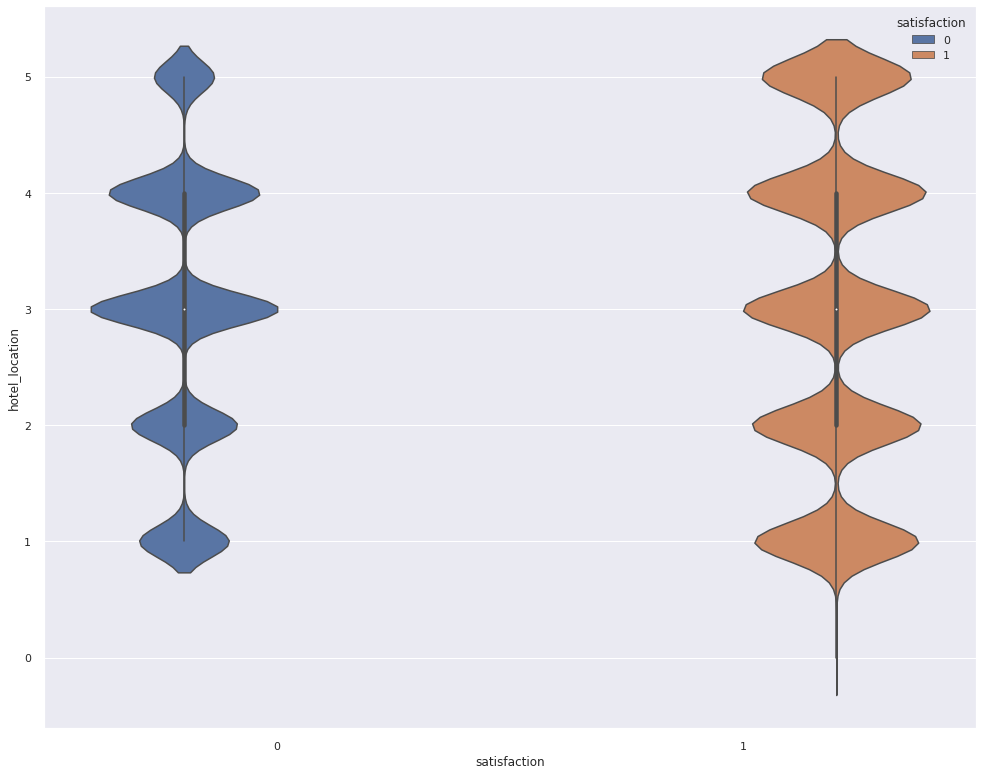

In [103]:
#import seaborn as sns

sns.set(rc={'figure.figsize':(16.7,13.27)})
# plotting the violinplot

#sns.violinplot(x="satisfaction",y="purpose_of_travel", hue="satisfaction", data=hotel_satisfaction_c);
sns.violinplot(x="satisfaction",y="hotel_location", hue="satisfaction", data=hotel_satisfaction_c);

plt.show()

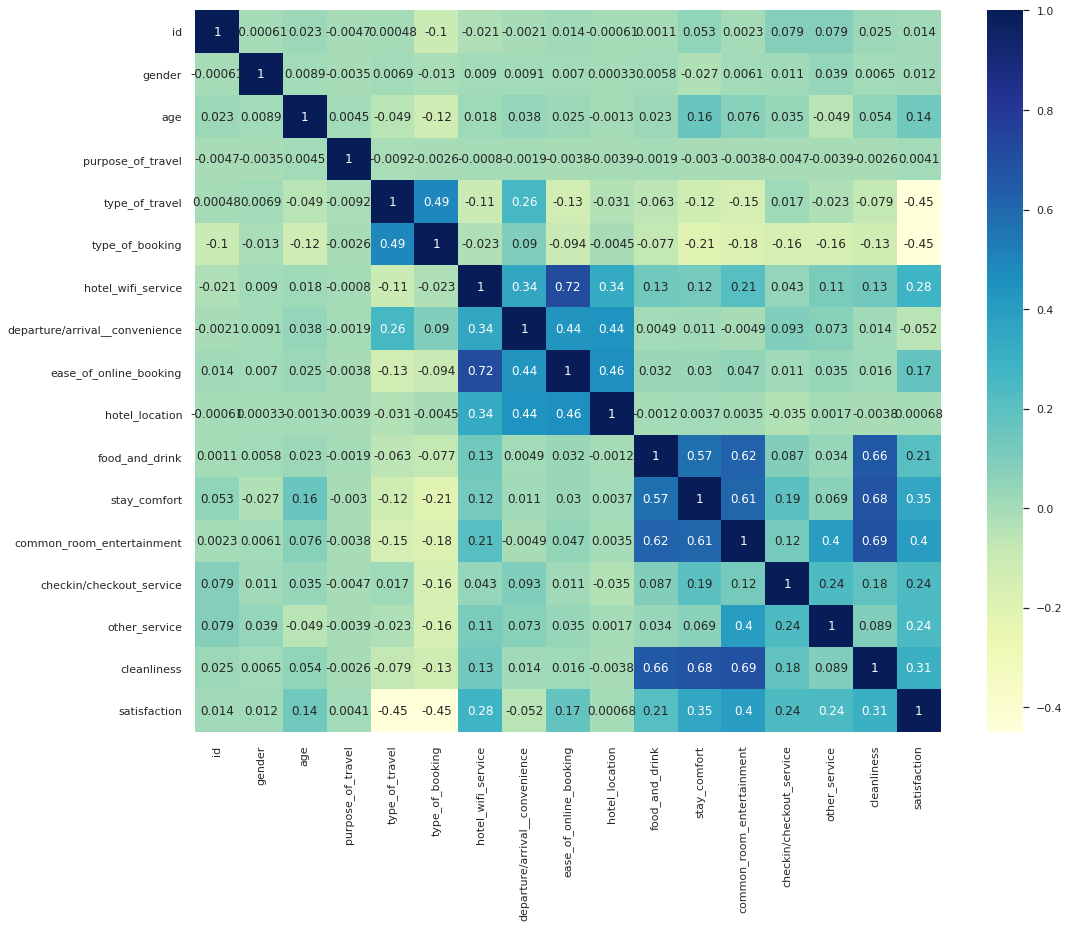

In [104]:
correlations_hotel = hotel_satisfaction_c.corr()
sns.heatmap(correlations_hotel, cmap="YlGnBu", annot=True)
plt.show()

In [105]:
#after preprocessing we define our target and features
X = hotel_satisfaction_c[['gender', 'age', 'purpose_of_travel', 'type_of_travel', 'type_of_booking', 'hotel_wifi_service', 'departure/arrival__convenience', 
      'ease_of_online_booking', 'hotel_location', 'food_and_drink', 'stay_comfort', 'common_room_entertainment', 'checkin/checkout_service',
    'other_service', 'cleanliness']]
y = hotel_satisfaction_c['satisfaction']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [106]:
#conn_sql = sqlite.connect('MasterAll.db')
hotel_satisfaction_c = pd.read_sql('SELECT * FROM hotel_satisfaction_clean', conn_sql)
hotel_satisfaction_c.columns

Index(['id', 'gender', 'age', 'purpose_of_travel', 'type_of_travel',
       'type_of_booking', 'hotel_wifi_service',
       'departure/arrival__convenience', 'ease_of_online_booking',
       'hotel_location', 'food_and_drink', 'stay_comfort',
       'common_room_entertainment', 'checkin/checkout_service',
       'other_service', 'cleanliness', 'satisfaction'],
      dtype='object')

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.metrics import classification_report
# import time

In [107]:
num_folds = 15
seed = 7
scoring = 'r2'

models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVR', SVR()))
models.append(('RFC', RandomForestClassifier()))

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [108]:
#Training the models and measuring duration
start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc


/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [109]:
print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

LogisticRegression: 
 time: 1.195
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     17651
           1       0.80      0.83      0.82     13521

    accuracy                           0.84     31172
   macro avg       0.84      0.84      0.84     31172
weighted avg       0.84      0.84      0.84     31172

GaussianNB: 
 time: 0.075
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     17651
           1       0.79      0.84      0.82     13521

    accuracy                           0.84     31172
   macro avg       0.83      0.84      0.83     31172
weighted avg       0.84      0.84      0.84     31172

LinearSVC: 
 time: 23.135
              precision    recall  f1-score   support

           0       0.63      0.99      0.77     17651
           1       0.93      0.23      0.37     13521

    accuracy                           0.66     31172
   macro avg       0.78      0.61      0.5

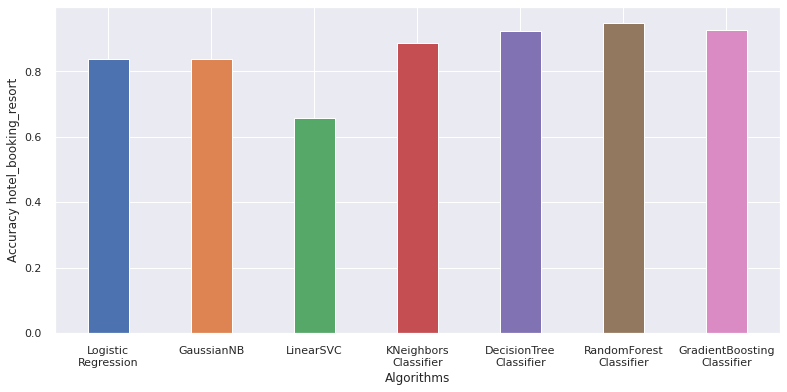

In [110]:
from sklearn.metrics import accuracy_score as acc

plt.figure(figsize=(13, 6))
plt.bar('Logistic\nRegression', acc(y_test, predictions_lr), width=0.4)
plt.bar('GaussianNB', acc(y_test, predictions_nb), width=0.4)
plt.bar('LinearSVC', acc(y_test, predictions_svc), width=0.4)
plt.bar('KNeighbors\nClassifier', acc(y_test, predictions_knn), width=0.4)
plt.bar('DecisionTree\nClassifier', acc(y_test, predictions_dtc), width=0.4)
plt.bar('RandomForest\nClassifier', acc(y_test, predictions_rfc), width=0.4)
plt.bar('GradientBoosting\nClassifier', acc(y_test, predictions_gbc), width=0.4)

plt.ylabel('Accuracy hotel_booking_resort')
plt.xlabel('Algorithms')
plt.show()

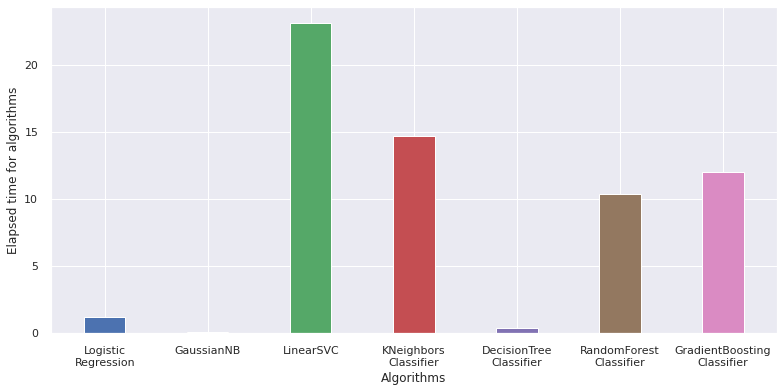

In [111]:
plt.figure(figsize=(13, 6))
plt.bar('Logistic\nRegression', elapsed_time_lr, width=0.4)
plt.bar('GaussianNB', elapsed_time_nb, width=0.4)
plt.bar('LinearSVC', elapsed_time_svc, width=0.4)
plt.bar('KNeighbors\nClassifier', elapsed_time_knn, width=0.4)
plt.bar('DecisionTree\nClassifier', elapsed_time_dtc, width=0.4)
plt.bar('RandomForest\nClassifier', elapsed_time_rfc, width=0.4)
plt.bar('GradientBoosting\nClassifier', elapsed_time_gbc, width=0.4)

plt.ylabel('Elapsed time for algorithms')
plt.xlabel('Algorithms')
plt.show()

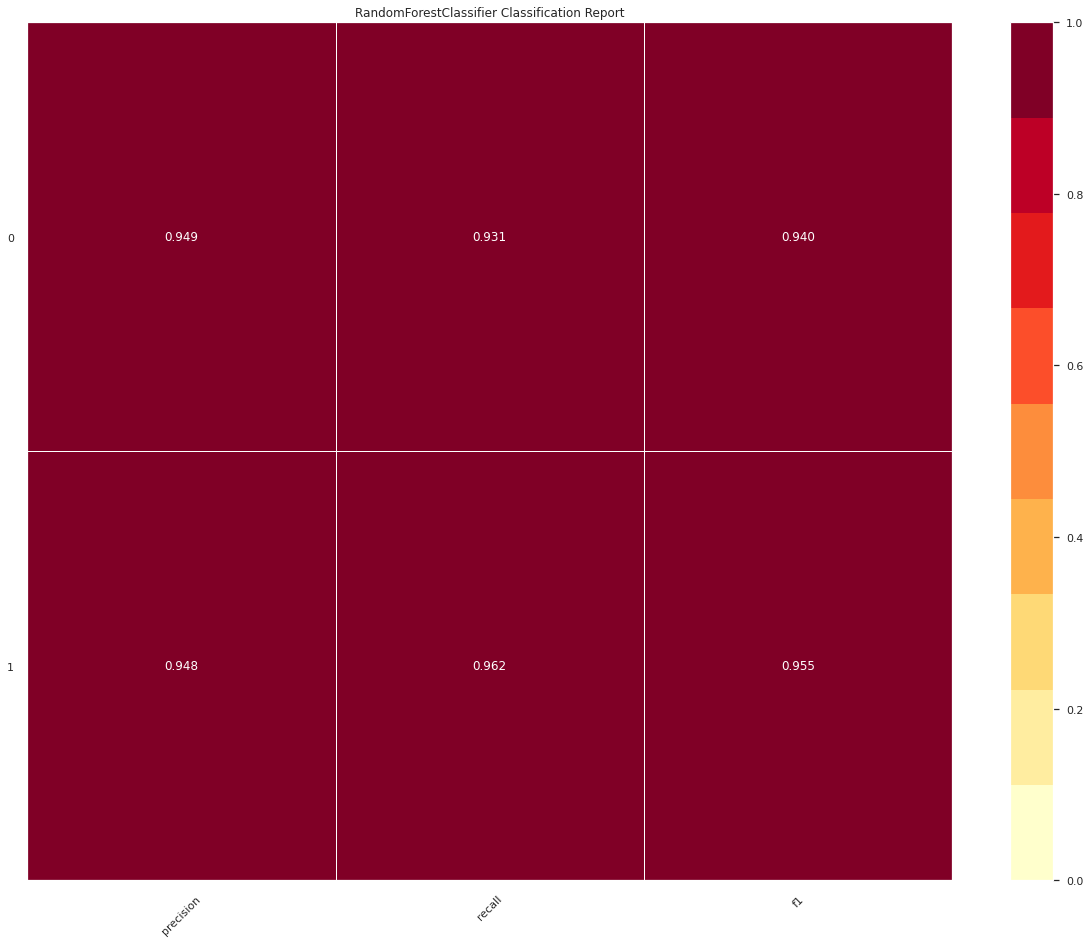

In [51]:
#from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(rfc, classes=['1','0'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data


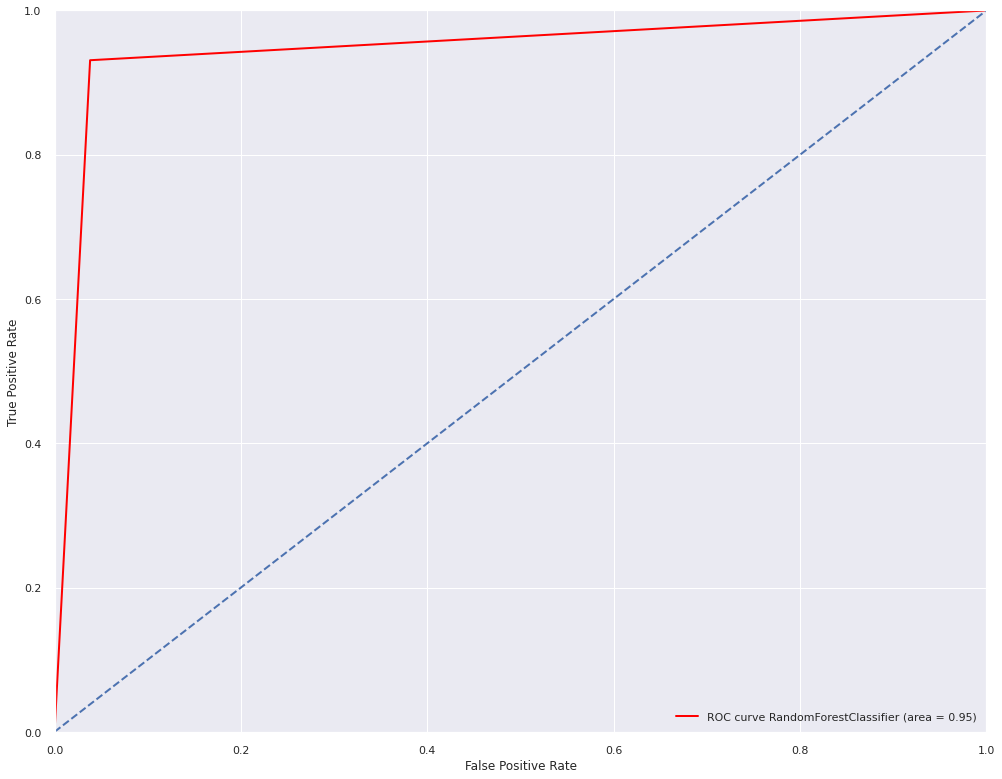

In [53]:
#from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_nb = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_nb)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [54]:
conn_sql.commit()
conn_sql.close()